# ML Churn Project
## Yajur Sehra

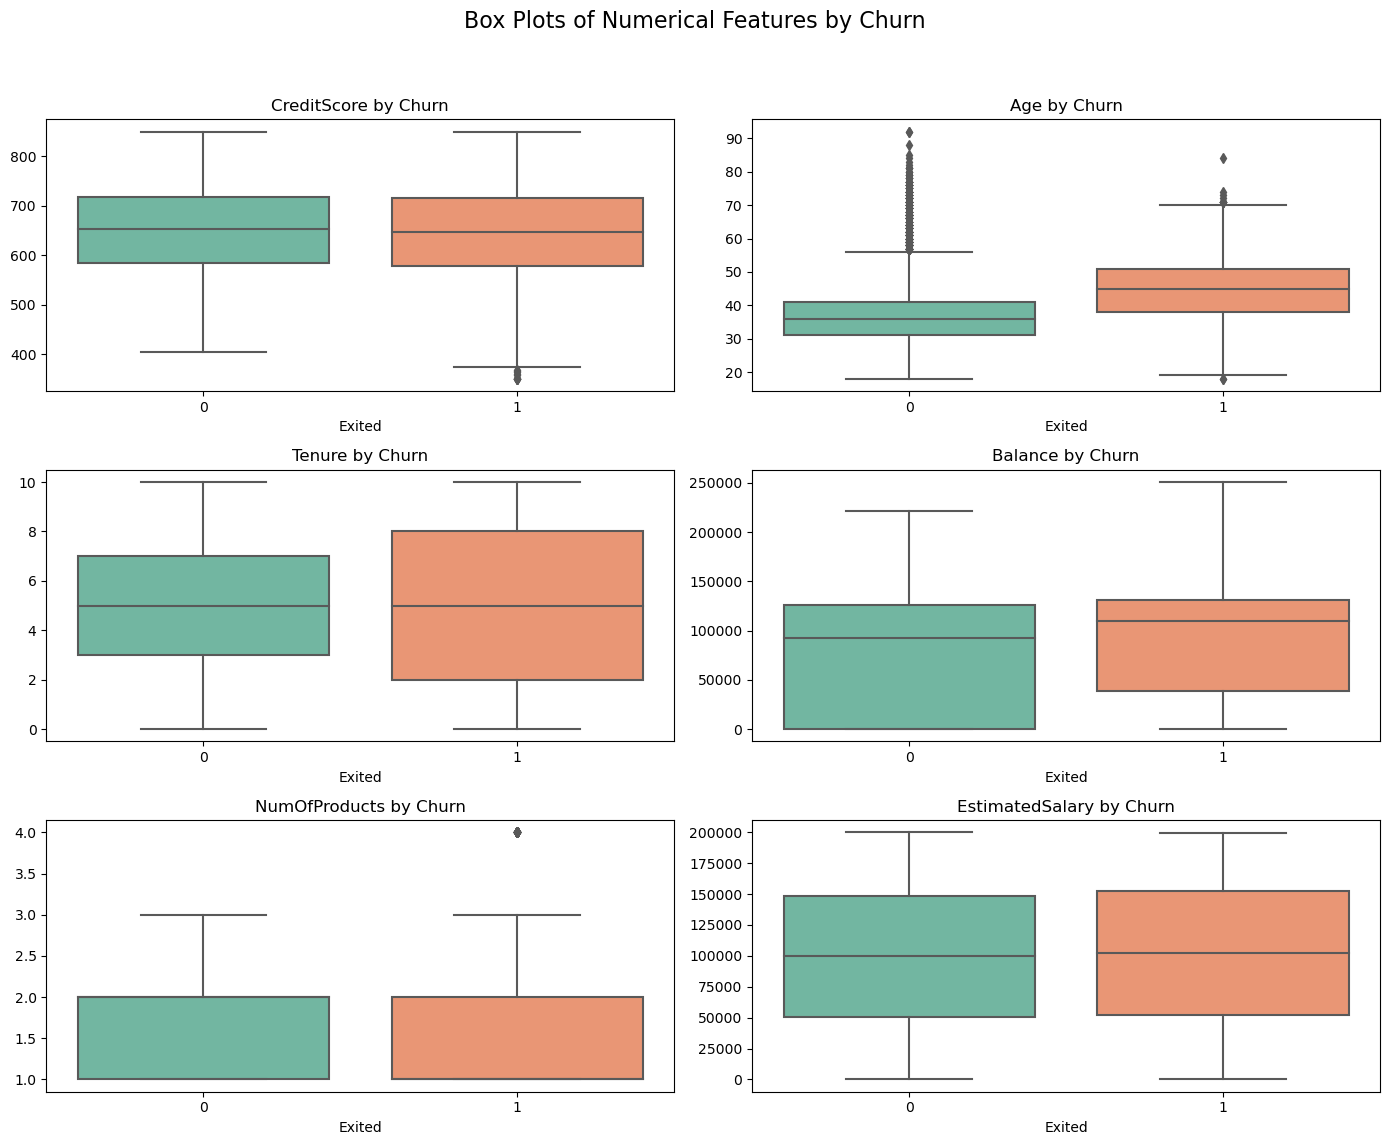

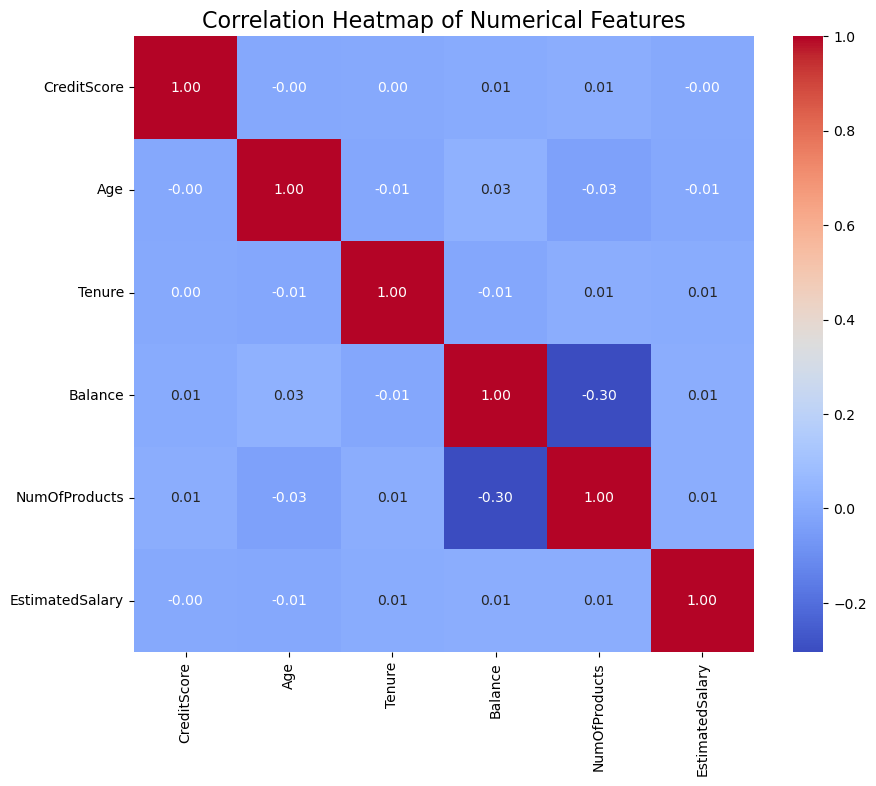

'\nBox Plot Insights:\n- Credit Score: Slightly lower median credit scores in customers who exited, suggesting a potential impact of credit health on customer retention.\n- Age: Clearly shows older customers are more likely to exit, indicating age could be a significant factor in churn.\n- Tenure: There is no significant difference in tenure between stayed and exited customers, suggesting tenure alone might not be a strong predictor of churn.\n- Balance: Customers with higher balances are more likely to churn, possibly indicating issues with more affluent customers or those with specific service expectations.\n- Number of Products: Customers with fewer products are more likely to churn, supporting a focus on cross-selling as a retention strategy.\n- Estimated Salary: Salary does not show a clear trend with churn, indicating it might not be a key factor in predicting churn.\n\nCorrelation Heatmap Insights:\n- Mild negative correlation between Number of Products and Balance suggests that

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

# Box plots against variable 'Exited'
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Box Plots of Numerical Features by Churn', fontsize=16)

num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for ax, feature in zip(axes.flatten(), num_features):
    sns.boxplot(x='Exited', y=feature, data=data, ax=ax, palette='Set2')
    ax.set_title(f'{feature} by Churn')
    ax.set_ylabel('')
    ax.set_xlabel('Exited')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Correlation heatmap
correlation_matrix = data[num_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

# Insights from EDA
'''
Box Plot Insights:
- Credit Score: Slightly lower median credit scores in customers who exited, suggesting a potential impact 
  of credit health on customer retention.
- Age: Clearly shows older customers are more likely to exit, indicating age could be a significant factor in churn.
- Tenure: There is no significant difference in tenure between stayed and exited customers, suggesting tenure alone
  might not be a strong predictor of churn.
- Balance: Customers with higher balances are more likely to churn, possibly indicating issues with more affluent 
  customers or those with specific service expectations.
- Number of Products: Customers with fewer products are more likely to churn, supporting a focus on cross-selling 
  as a retention strategy.
- Estimated Salary: Salary does not show a clear trend with churn, indicating it might not be a key factor in predicting churn.

Correlation Heatmap Insights:
- Mild negative correlation between Number of Products and Balance suggests that customers with more products tend to have 
  lower balances, which could inform product and pricing strategies.
- The lack of strong correlations between most features suggests that multicollinearity is unlikely to be a problem in modeling.
'''


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score


# Drop unnecessary columns
data_clean = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Convert categorical variables
data_preprocessed = pd.get_dummies(data_clean, drop_first=True)

# Split the data in test and train
X = data_preprocessed.drop('Exited', axis=1)
y = data_preprocessed['Exited']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Random Forest with GridSearchCV
random_forest_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_forest_model = grid_search.best_estimator_
y_pred_forest = best_forest_model.predict(X_test)

# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluating models
models = {'Logistic Regression': y_pred_logistic, 'Random Forest': y_pred_forest, 'SVM': y_pred_svm}
evaluation = {model: {'Confusion Matrix': confusion_matrix(y_test, pred),
                      'Precision': precision_score(y_test, pred),
                      'Recall': recall_score(y_test, pred),
                      'ROC AUC': roc_auc_score(y_test, pred)}
              for model, pred in models.items()}

# evaluation results
for model, metrics in evaluation.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

#best parameters from GridSearchCV
print("Best parameters for Random Forest:", grid_search.best_params_)


Logistic Regression:
Confusion Matrix: [[1543   64]
 [ 314   79]]
Precision: 0.5524475524475524
Recall: 0.2010178117048346
ROC AUC: 0.5805960247074267

Random Forest:
Confusion Matrix: [[1550   57]
 [ 203  190]]
Precision: 0.7692307692307693
Recall: 0.48346055979643765
ROC AUC: 0.7239953701284615

SVM:
Confusion Matrix: [[1562   45]
 [ 243  150]]
Precision: 0.7692307692307693
Recall: 0.3816793893129771
ROC AUC: 0.676838450101417

Best parameters found for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


False Positives: In this case, the SVM and Random Forest have similar precision, so they would incur similar costs from false alarms — customers who were predicted to churn but did not. However, given the higher recall, Random Forest gives better balance; it does not miss out on as many customers who do churn (lower false negatives).
False Negatives: The logistic regression model, while having a recall of only 20.10%, would miss a lot of customers who would churn, which is a significant loss in terms of customer relationship opportunities. Random Forest's higher recall indicates it will catch more customers who are likely to churn, providing an opportunity to intervene and potentially retain the customer.